# Modelling Assignment 1

In [8]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as spi

print("packages imported")

packages imported


## Problem Statement

Construct a deterministic mathematical model that describes how the concentrations of the four major greenhouse gases, namely, carbon dioxide (CO2), methane (CH4), nitrous oxide (N2O), and water vapour (H2O) change over time in Earth’s atmosphere.
The model must account for natural (volcanoes, wetlands, oceans, plants) processes that add or remove these gases, forming a dynamic balance that governs atmospheric greenhouse gas levels.

## Variables and Parameters

| Description | Symbol | Units | Dimensions | Type |
| --- | ---| --- | --- | --- |
| concentration of $CO_2$ | $C$ | $\text{ppm}$ | $1$ | dependent variable |
| concentration of $CH_4$ | $M$ | $\text{ppm}$ | $1$ | dependent variable |
| concentration of $N_2 O$ | $N$ | $\text{ppm}$ | $1$ | dependent variable |
| concentration of $H_2 O$ | $W$ | $\text{ppm}$ | $1$ | dependent variable |
| time | $t$ | $\text{years}$ | $T$ | independent variable |
| volcanic source rates of $CO_2, H_2 O$ | $V_c, V_w$ | $\frac{\text{ppm}}{\text{years}}$ | $\frac{1}{T}$ | parameter |
| wetland source rates of $CO_2, CH_4, N_2 O$ | $W_c, W_m, W_n$ | $\frac{\text{ppm}}{\text{years}}$ | $\frac{1}{T}$ | parameter |
| net evaporation source rate of $H_2 O$ | $E_w$ | $\frac{\text{ppm}}{\text{years}}$ | $\frac{1}{T}$ | parameter |
| loss rate of methane by oxidation | $X_m$ | $\frac{1}{\text{years}}$ | $\frac{1}{T}$ | parameter |
| ocean absorption rate for $CO_2, N_2 O$ | $O_c, O_n$ | $\frac{1}{\text{years}}$ | $\frac{1}{T}$ | parameter |
| plant uptake rate for $CO_2$ | $P_c$ | $\frac{1}{\text{years}}$ | $\frac{1}{T}$ | parameter |
| precipitation removal rate of $H_2 O$ | $R_w$ | $\frac{1}{\text{years}}$ | $\frac{1}{T}$ | parameter |
| initial concentration of $CO_2, CH_4, N_2 O, H_2 O$ | $C_0, M_0, N_0, W_0$ | $\text{ppm}$ | $1$ | constant |

## Assumptions and Constraints:

- The atmosphere is well-mixed, meaning spatial variations are neglected.
- Source and sink rates are constant over time (can be modified for future scenarios).
- Methane oxidation follows a first-order decay law with fixed stoichiometry:
$$CH_4 + 2 O_2 \rightarrow CO_2 + 2 H_2 O$$
- Oxygen concentration is large and effectively constant
- Biological and oceanic absorption processes act as linear relaxations toward equilibrium states.
- The model neglects short-term weather variability, focusing on multi-year to decadal trends.
- Atmospheric temperature and pressure are constant.
- No anthropogenic factors (fossil fuels, agriculture, industry) are included.
- Greenhouse gases produced or removed by human activities are ignored.
- The atmosphere is a closed system.
- The atmosphere is only one layer and it has a constant volume.
- All coefficients are constant in time, that is, they don't vary seasonally or by year.
- Temperature and pressure and constant so no Clausius–Clapeyron relation (thermodynamic relationship that describes the change in vapor pressure of a substance with temperature), carbonate-chemistry temperature feedbacks, and cloud microphysics are ignored.

## Building Solution:

We treat the atmosphere as a single, well-mixed box. For each greenhouse gas, the rate of change of its concentration equals **sources minus sinks**.

### CO₂ balance
Natural sources add $CO_2$ through volcanic and wetland emissions at rates $(V_c)$ and $(W_c)$.  
Oxidation of methane produces one molecule of $CO_2$ per $CH_4$, contributing an additional source $(+X_m M)$.  
CO₂ is removed by plants and oceans with first-order rates $(P_c)$ and $(O_c)$.  
Hence,

$$ \frac{dC}{dt} = V_c + W_c + X_m M - (P_c + O_c)\,C $$

### CH₄ balance
Methane is supplied by wetlands $(W_m)$ and lost through oxidation with rate $(X_m M)$:

$$ \frac{dM}{dt} = W_m - X_m\,M  $$

### N₂O balance
Nitrous oxide is emitted from wetlands $(W_n)$ and absorbed by the ocean at rate $(O_n N)$:

$$ \frac{dN}{dt} = W_n - O_n\,N $$


### H₂O balance
Water vapour has sources from volcanic activity $(V_w)$, net evaporation $(E_w)$,  
and production from methane oxidation (2 $H_2 O$ per $CH_4$ oxidized, giving $(+2X_m M)$.  
It is removed by precipitation at rate $(R_w W)$:

$$ \frac{dW}{dt} = V_w + E_w + 2X_m\,M - R_w\,W$$


## Non-dimensionalization:


Starting dimensional system:

\
\begin{aligned}
\frac{dC}{dt} &= V_c + W_c + X_m M - (P_c + O_c)C, \\
\frac{dM}{dt} &= W_m - X_m M, \\
\frac{dN}{dt} &= W_n - O_n N, \\
\frac{dW}{dt} &= V_w + E_w + 2X_m M - R_w W.
\end{aligned}



Define non-dimensional variables as,

$$
C = [C]\,C^*, \quad 
M = [M]\,M^*, \quad 
N = [N]\,N^*, \quad 
W = [W]\,W^*, \quad 
t = [t]\,t^*.
$$

Substituting into the governing equations,


\begin{aligned}
\frac{[C]}{[t]}\frac{dC^*}{dt^*} &= V_c + W_c + X_m[M]M^* - (P_c + O_c)[C]C^*, \\
\frac{[M]}{[t]}\frac{dM^*}{dt^*} &= W_m - X_m[M]M^*, \\
\frac{[N]}{[t]}\frac{dN^*}{dt^*} &= W_n - O_n[N]N^*, \\
\frac{[W]}{[t]}\frac{dW^*}{dt^*} &= V_w + E_w + 2X_m[M]M^* - R_w[W]W^*.
\end{aligned}


On simplifying, that is, dividing the respective equations by the coefficients of the derivative we get,


\begin{aligned}
\frac{dC^*}{dt^*} &= V_c\frac{[t]}{[C]} + W_c\frac{[t]}{[C]} 
+ X_m\frac{[M][t]}{[C]}M^* - (P_c + O_c)[t]C^*, \\
\frac{dM^*}{dt^*} &= W_m\frac{[t]}{[M]} - X_m[t]M^*, \\
\frac{dN^*}{dt^*} &= W_n\frac{[t]}{[N]} - O_n[t]N^*, \\
\frac{dW^*}{dt^*} &= V_w\frac{[t]}{[W]} + E_w\frac{[t]}{[W]} 
+ 2X_m\frac{[M][t]}{[W]}M^* - R_w[t]W^*.
\end{aligned}


Now, we choose the time scale. Let 

$$
[t] = \frac{1}{P_c + O_c}.
$$

We can then substitute $[t]$ to get


\begin{aligned}
\frac{dC^*}{dt^*} &= \frac{V_c + W_c}{(P_c + O_c)[C]} 
+ \frac{X_m[M]M^*}{(P_c + O_c)[C]} - C^*, \\
\frac{dM^*}{dt^*} &= \frac{W_m}{(P_c + O_c)[M]} - \frac{X_m}{P_c + O_c}M^*, \\
\frac{dN^*}{dt^*} &= \frac{W_n}{(P_c + O_c)[N]} - \frac{O_n}{P_c + O_c}N^*, \\
\frac{dW^*}{dt^*} &= \frac{V_w}{(P_c + O_c)[W]} 
+ \frac{E_w}{(P_c + O_c)[W]} 
+ \frac{2X_m[M]M^*}{(P_c + O_c)[W]} - \frac{R_w}{P_c + O_c}W^*.
\end{aligned}


Let the concentration scales be

$$
[C] = \frac{V_c + W_c}{P_c + O_c}, \quad
[M] = \frac{W_m}{P_c + O_c}, \quad
[N] = \frac{W_n}{P_c + O_c}, \quad
[W] = \frac{V_w + E_w}{P_c + O_c}.
$$

**Therefore, the final non-dimensionalized form is**

$$
\begin{aligned}
\frac{dC^*}{dt^*} &= 1 + 
\frac{X_m[M]M^*}{V_c + W_c} - C^*, \\
\frac{dM^*}{dt^*} &= 1 - 
\frac{X_m}{P_c + O_c}M^*, \\
\frac{dN^*}{dt^*} &= 1 - 
\frac{O_n}{P_c + O_c}N^*, \\
\frac{dW^*}{dt^*} &= 1 + 
\frac{2X_m W_m M^*}{(P_c + O_c)(V_w + E_w)} - 
\frac{R_w}{P_c + O_c}W^*.
\end{aligned}
$$

where the initial conditions are as follows:

$$
\begin{aligned}
C^*(0) &= \frac{C_0(P_c + O_c)}{V_c + W_c}, \\
M^*(0) &= \frac{M_0(P_c + O_c)}{W_m}, \\
N^*(0) &= \frac{N_0(P_c + O_c)}{W_n}, \\
W^*(0) &= \frac{W_0(P_c + O_c)}{V_w + E_w}.
\end{aligned}
$$

In [12]:
Vc, Vw = 0.036, 0.2                    # volcano source rates
Wc, Wm, Wn = 0.58, 0.00458, 0.00004           # wetland source rates
Ew = 25.291                             # evaporation source rate
Xm = 1/12                             # methane oxidation rate
Oc, On = 0.00288, 0.00312                    # ocean absorbtion rate
Pc = 0.08                             # plant uptake rate
Rw = 24.233                             # precipitation removal rate
C0, M0, N0, W0 = 422.9, 1.92, 0.33, 4000.  # initial gas concentrations

# nondimensionalized parameters

C_units = (Vc+Wc)/(Oc+Pc)
M_units = Wm/(Oc+Pc)
N_units = Wn/(Oc+Pc)
W_units = (Vw+Ew)/(Oc+Pc)

alpha = Xm/(Vc+Wc) * M_units
beta = Xm/(Oc+Pc)
gamma = On/(Oc+Pc)
omega = 2*Xm/(Vw+Ew) * M_units
sigma = Rw/(Oc+Pc)

C_star0 = C0 / C_units
M_star0 = M0 / M_units
N_star0 = N0 / N_units
W_star0 = W0 / W_units

In [13]:
# u[0] = C*, u[1] = M*, u[2] = N*, u[3] = W*
def f(u,t):
    dudt = np.zeros(4)
    dudt[0] = 1 + alpha*u[1] - u[0]
    dudt[1] = 1 - beta*u[1]
    dudt[2] = 1 - gamma*u[2]
    dudt[3] = 1 + omega*u[1] - sigma*u[3]
    return dudt

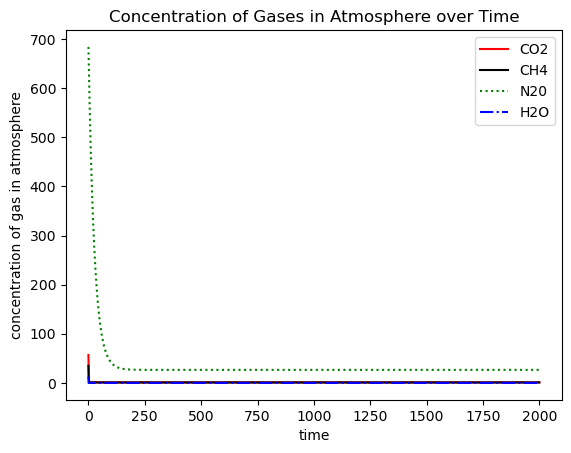

In [17]:
u0 = [C_star0, M_star0, N_star0, W_star0]
t = np.linspace(0,2000,10000)
u = spi.odeint(f,u0,t)

plt.plot(t,u[:,0],'r')
plt.plot(t,u[:,1],'-k')
plt.plot(t,u[:,2],':g')
plt.plot(t,u[:,3],'-.b')
plt.title('Concentration of Gases in Atmosphere over Time')
plt.xlabel('time')
plt.ylabel('concentration of gas in atmosphere')
plt.legend(['CO2','CH4','N20','H2O'])
plt.show()